<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Network Science SS 2020</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Python Computer Exercise 4</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Percolation</h1>
<hr>

**Website:** http://www.thp.uni-koeln.de/witthaut/group.html


**Submission:** Please upload your solutions to Ilias.

#### **Pugazharasu Anancia Devaneyan**

#### **Ram Surya Sri Shourie Mummadavarapu**

## Percolation and the Giant Connected Component (GCC)

The Giant Connected Component is, like the name suggests, the biggest connected component in a graph. Interestingly when studying this, we come across *percolation*, which is a phenomena existent across fields (e.g. propagation of forest fires, phase trasitions in Ising-like models). We want to use the notion of percolation to study the emergence of a GCC in Erdős–Rényi Random Graphs $G(n,p)$.

To study percolation we need an algorithm that runs over the nodes and identifies if a certain set of nodes is part of a connected component. This is your task.

Here is a mesmerising example of percolation of a 2D lattice. In this case you see percolation, i.e., most of the system is connected to each other (in black). <img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/Percolation.gif" alt="percolation of a 2D lattice" width="200" height="200">

## 1. Percolation in Random Graphs
Our task is to design a method to identify the connected components in any graph $G$. Naturally the properties we want to study emerge in Erdős–Rényi Random Graphs $G(n,p)$.

We know two things:
 - If $p=0$ ($G(n,0)$) we have a graph with $n$ vertices and no edges
 - If $p=1$ ($G(n,1)$) we have a graph with have a fully connected graph, i.e., everyone is connected to everyone (so the GCC is the graph).

We have also seen, analytically, that if the *mean degree* $c < 1$ there is no GCC, and if $c > 1$, there should be a CGG with some relative size $s$, i.e., number of vertices in the GCC $n_{GCC}$ in comparison with $n$. We also have that the mean degree $c=\frac{p}{n-1}$. Let's try and reproduce Newman's result below:

![](https://cs.slu.edu/~esposito/teaching/1080/webscience/images/random-components-v2.jpg)

### Tasks
Make your own percolation algorithm:
1. Design a method to identify which nodes are connected (you can check your results vs. `nx.number_connected_components()`)
2. Design a method to find the size of all connected component
3. Apply this to our case-study: Erdős–Rényi Random Graphs and study the largest/giant connected component
4. Identify the transition (this implies iterating over graphs with changing $c$)

Moreover, think about the following question:
 - Not in the thermodynamic limit ($n\neq\infty$), can you have a GCC with size $s=1$?

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def connected_component_sizes(G):
    adj = G.adj
    a = set()
    component_sizes = []
    for v in G:
        if v not in a:
            b = set()
            nl = {v}
            while nl:
              tl = nl
              nl = set()
              for k in tl:
                if k not in b:
                  b.add(k)
                  nl.update(adj[k])
            c = b
            a.update(c)
            component_sizes.append(c)
    return component_sizes


In [ ]:
# verification 
G = nx.path_graph(4)

largest_cc1 = max(nx.connected_components(G), key=len)
largest_cc2 = max(connected_component_sizes(G), key=len)
print(largest_cc1, largest_cc2)

{0, 1, 2, 3} {0, 1, 2, 3}


In [ ]:
# Design a function to iterate over various graphs that evaluates the size of the biggest component.
# Recall: this is all statistical physics, so do a set of iterations over (res=50 like 50 iterations)
# to get a statistically significant result.

def GCC_size(N, res=50):
  p = np.linspace(0, 1, res)
  k = N*p
  gcc = []
  for i in p:
    g = nx.erdos_renyi_graph(N, i)
    ccList = connected_component_sizes(g)
    gcc.append(max(len(cc) for cc in ccList))
  return p, gcc

In [ ]:
# Get an array c and the (normalised) sizes S from GCC_size()
c, S = GCC_size(N=75)

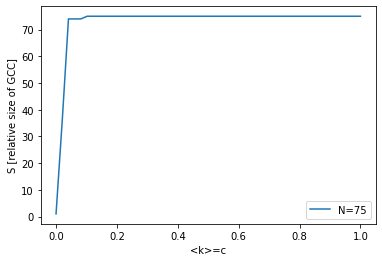

In [ ]:
plt.plot(c, S, label='N=75')
plt.xlabel("<k>=c")
plt.ylabel("S [relative size of GCC]")
plt.legend()

Here is a picture of a classy cat to brighten your day:
![](https://i.stack.imgur.com/CnGo4.png)